## 1. Exercice : Bruiter un signal
+ Créez une fonction **bruiter** qui prend en entrée un signal  $x$  et un écart type $\sigma$

et ajoute au signalune réalisation d un bruit blanc gaussien centrée de variance $\sigma^2$. 

On pourra utiliser la fonction **rnorm** adéquatement.

In [5]:
bruiter <- function (x, sigma) x + rnorm(length(x), mean = 0, sd = sigma)

## Exercice 2 : Test de la fonction bruiter
+ Tester cette fonction sur différents signaux et pour différentes valeurs de $\sigma$.

+ Visualiser à chaque fois le signal original, sa *transformée de Fourier discrète*  
et de meme le signal bruité ainsi que sa *transformée de Fourier discrète*.

_Pense-bete_: On pensera (pour plus de visibilité, si nécessaire) à regarder  
les transformées de Fourier discrètes en échelle log et on pourra également utiliser la fonction R *fftshift*.


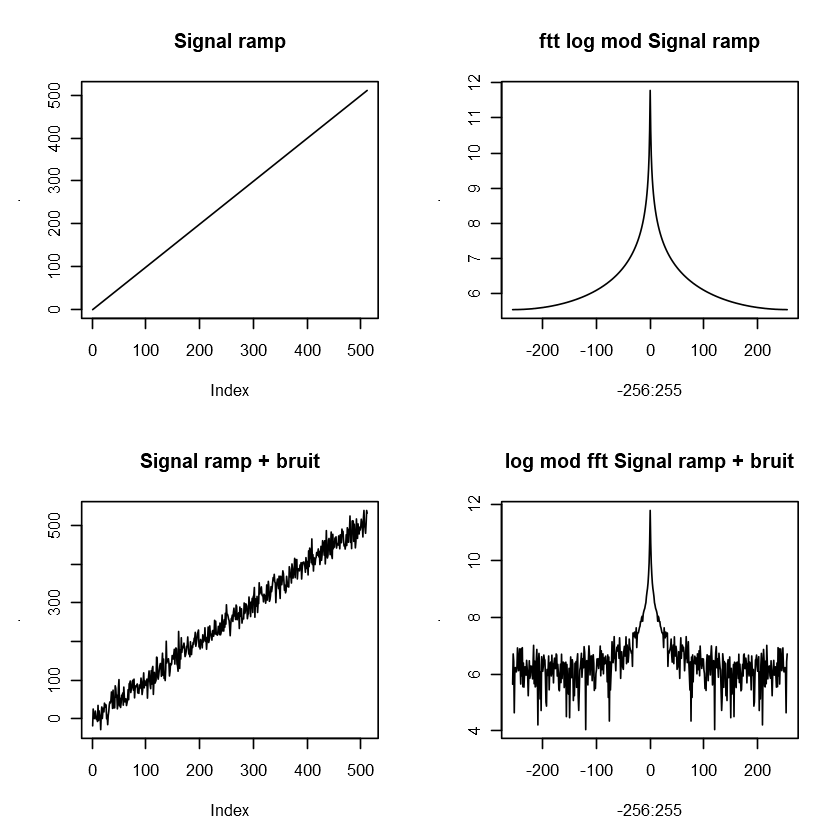

In [151]:
# signal simple synthetique
library(tidyverse)
library(SynchWave)
N <- 512
n <- 0:(N-1)
ramp <- seq(from = 0, to = N-1, by = 1)
par(mfrow=c(2,2))

#test
ramp %>% plot( type = "l", main = 'Signal ramp')

ramp %>% fft %>% fftshift %>% Mod %>% log %>% plot(x=-256:255, type='l', main = 'ftt log mod Signal ramp') 

bruiter(ramp, 20) %>% plot(type = "l", main = 'Signal ramp + bruit')

bruiter(ramp, 20) %>% fft %>% fftshift %>% Mod %>% log %>% plot(x= -256:255, type = "l",main = 'log mod fft Signal ramp + bruit')



Autre signal

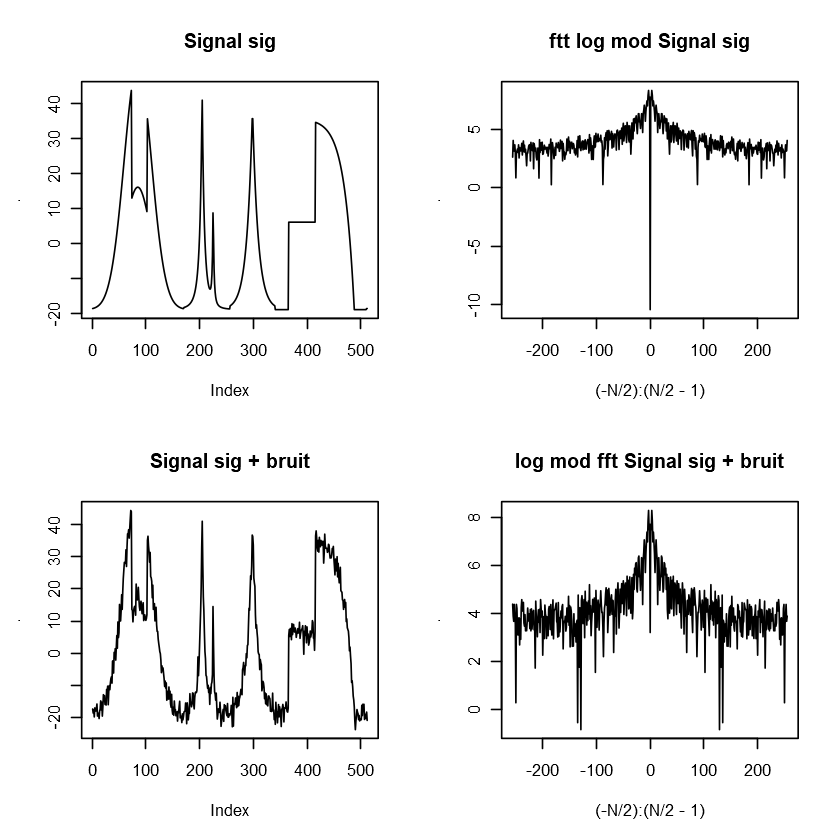

In [154]:
#signal sig1.txt
sig <- read.table("sig.txt")
sig <- t(sig)
N <- length(sig)
n <- 0:(N-1)
par(mfrow=c(2,2))
sig %>% plot( type = "l", main = 'Signal sig')
sig %>% fft %>% Mod %>% c() %>%  fftshift %>% log %>% plot(x= (-N/2):(N/2 - 1), type='l', main = 'ftt log mod Signal sig') 
bruiter(sig, 2) %>% plot(type = "l", main = 'Signal sig + bruit')
bruiter(sig, 2) %>% fft %>% Mod %>% c() %>% fftshift %>% log %>% plot(x= (-N/2):(N/2 - 1), type = "l",main = 'log mod fft Signal sig + bruit')


## Exercice 3 : Filtrage en Fourier
+ Créez une fonction **filtrageFourier** qui prend en entrée la réponse fréquentielle  
d'un filtre et un signal x et renvoie le résultat y du filtrage.  
(_attention_ à la normalisation 1/N de la fft)


In [52]:
filtageFourier <- function (h, x) (1/length(x)) * convolve(h, x)

## Exercice 4 : Test de la fonction filtrageFourier
+ Tester cette fonction et filtrer un ou plusieurs signaux en utilisant  
par exemple le filtre donné par gaussian (on pourra prendre $s=3$ par exemple). 


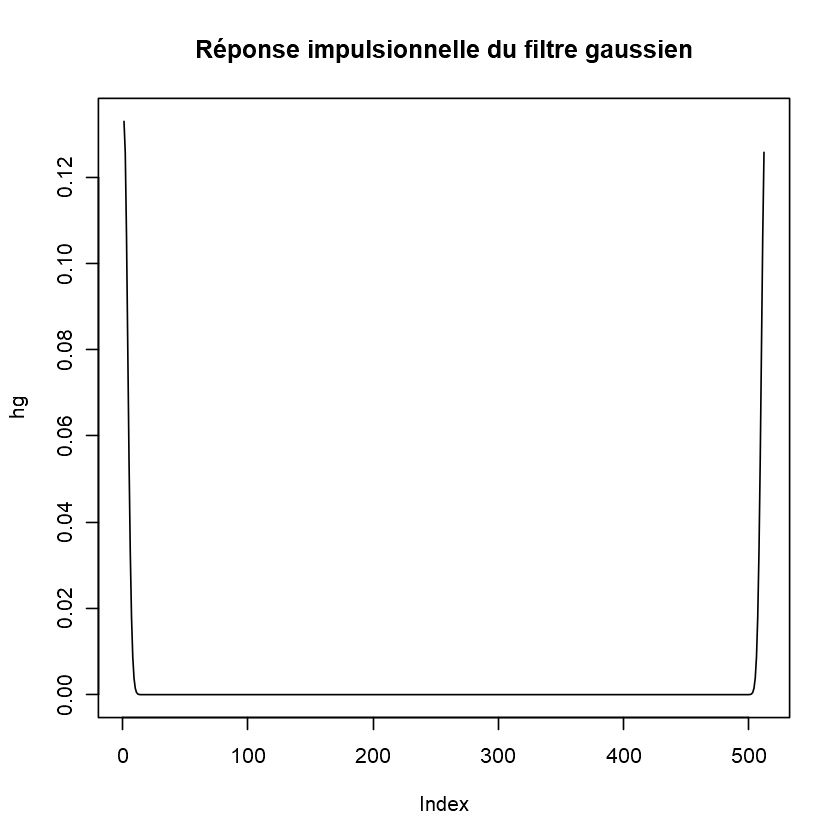

In [155]:
#réponse impulsionnelle filtre gaussien
#n taille du signal à traiter
#s ecart-type de la gaussienne
gaussian <- function(n,s){
  x <- c(0:(n/2-1), (-n/2):-1)
  h <- exp( (-x^2)/(2*s^2) )
  h <- h/sum(h)
  h
}
hg <- gaussian(N,3)
plot(hg, type="l")
title('Réponse impulsionnelle du filtre gaussien')

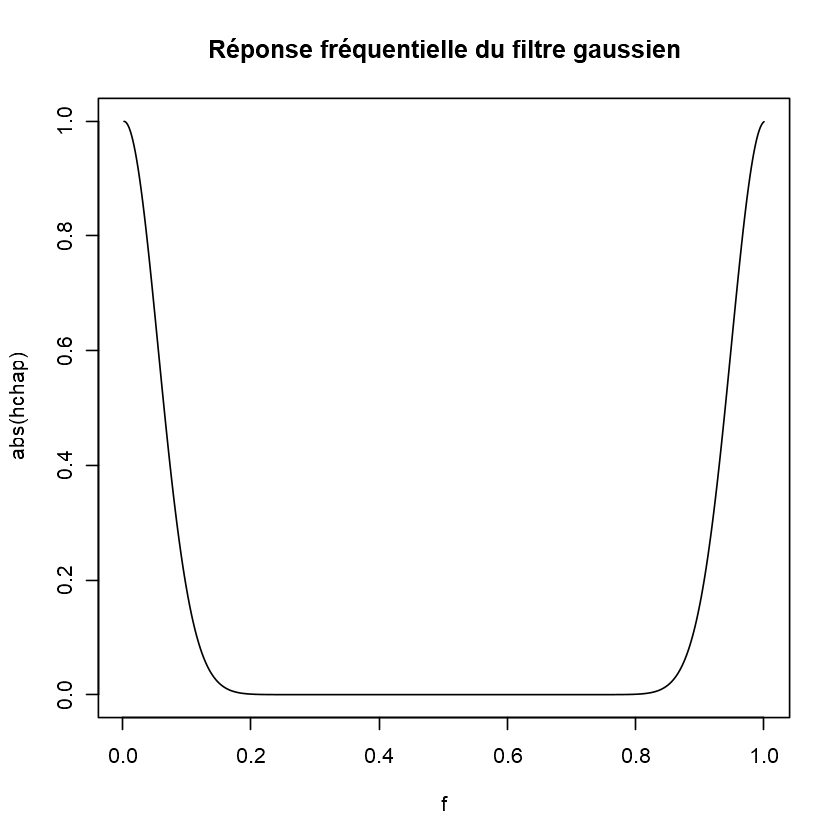

In [15]:
hchap <- fft(hg)
f=(1:N)/N
plot(f,abs(hchap),type="l")
title('Réponse fréquentielle du filtre gaussien')

+ Visualiser à chaque fois le signal original, le signal filtré, leurs transformées de Fourier finies, et également la réponse fréquentielle du filtre.  
+ Quelle(s) conclusion(s) pouvez-vous tirer de ces figures ?


## Exercice 5 : Filtre de Wiener en débruitage
+ Créez une fonction **filtredebruitwiener** qui prend en entrée un signal x et un \'ecart-type $sigma$, et ressort la réponse fréquentielle du filtre de Wiener vu en TD.

Au cas où on rappelle que la formule qui donne le filtre de restauration de Wiener dans le cas du débruitage est
$$\hat{h}(\omega)=\frac{\mathcal{S}_X(\omega)}{\mathcal{S}_X(\omega)+\sigma^2} $$
où $\mathcal{S}_X$ est la densité spectrale du processus aléatoire $X$ dont le signal de départ $x$ est une r\'ealisation.

_Remarque_ : ici on considère que le signal de départ $x$ est une réalisation d'un processus aléatoire $X$ sous jacent. Pour obtenir $\mathcal{S}_X$ on utilise la méthode du ``périodogramme'' sur une seule réalisation.
Nous avons une seule réalisation, donc on estime directement $$\mathcal{S}_X=\frac{|\widehat{x}|^2}{N}$$ avec $\widehat{x}$ la transformée de Fourier finie de $x$ et $N$ sa taille.



## Exercice 6 : Test de la fonction filtredebruitwiener
+ Tester cette fonction: ajouter du bruit sur un signal donné, et le débruiter à l'aide du filtre de Wiener.  
+ Visualiser à chaque fois le signal original, le signal filtré Wiener, leurs transformées de Fourier finies, et également la réponse fréquentielle du filtre.  
+ Comment vous apparait la restauration du signal ? Que pourriez-vous proposer pour essayer d'améliorer le résultat ?


## Exercice 7 : Mesure de performances
+ Estimer la qualité de la reconstruction à l'aide du critère SNR (Signal to noise ratio).  
Si $\tilde{y}$ est le signal restauré et $y$ le signal original non bruité, le SNR est défini par:

$$
SNR(\tilde{y},y)=10\log_{10}\left(\frac{\parallel y\parallel_2^2}{\parallel y-\tilde{y}\parallel_2^2}\right) \qquad \text{où} \quad \parallel y\parallel_2^2=\sum\limits_{n_1=0}^{N-1}\sum\limits_{n_2=0}^{N-1} |y_{n_1,n_2}|^2.
$$
+ Créer une fonction SNR qui calcule le SNR entre deux signaux.  
+ Calculer le SNR entre le signal original et le signal bruité et le SNR entre le signal original et le signal filtré Wiener  
+ Vérifier que : SNR entre le signal original et le signal bruité $<$ SNR entre le signal original et le signal filtré Wiener.  


## Exercice 8
Cette fois-ci on se propose de débruiter un signal réel. Ce signal est contenu dans "RaphaelNMR.dat".  
Ce signal constitue les observations bruitées et nous n'avons pas accès au signal original ni à la variance du bruit.  
+ Appliquer le filtre de Wiener à ce signal afin de le débruiter.  
+ Expliquer et commenter votre démarche.


In [17]:
#signal sig1.txt
x <- read.table("RaphaelNMR.dat")
x <- t(t(x))
N <- length(x)
n = 0:(N-1)
plot(n,x,type="l")
title('Signal RaphaelNMR.dat')


Warning message in file(file, "rt"):
"impossible d'ouvrir le fichier 'RaphaelNMR.dat' : No such file or directory"

ERROR: Error in file(file, "rt"): impossible d'ouvrir la connexion


## Exercice 9 : Application à des images
On se propose à présent de regarder ce qui se passe lorsque le signal considéré est un signal 2D : une image !


In [18]:
library(imager)
img <- load.image("lena.png")
N<-512
img<-img[1:N,1:N,1]
n<-1:N
image(n,n,img, ylim=c(N,1),col = gray(0:255/255))

Warning message:
"package 'imager' was built under R version 3.5.2"Loading required package: magrittr

Attaching package: 'imager'

The following object is masked from 'package:magrittr':

    add

The following objects are masked from 'package:stats':

    convolve, spectrum

The following object is masked from 'package:graphics':

    frame

The following object is masked from 'package:base':

    save.image



ERROR: Error in wrap.url(file, load.image.internal): File not found


Dans ce cas, le filtre gaussien 2D est donné par

In [19]:
library(plot3D)
library(imager)

#réponse impulsionnelle filtre gaussien
gaussian2D<-function(n,s){
  x <- c(0:(n/2-1), (-n/2):-1)
  h <- outer(x, x, FUN = function(x, y) exp(-x^2-y^2)/(2*s^2))
  h <- h/sum(sum(h))
  h
}

#exemple d'utilisation
N<-512
s<-3

hg<-gaussian2D(N,s)

image(n,n,hg,col = gray(0:255/255))
title('Réponse impulsionnelle filtre 2D')

# on trace une seule ligne
plot(n,hg[1,1:N],type="l")
title('Première ligne de la réponse impulsionnelle filtre 2D')

# on regarde la réponse fréquentielle
f=n/N
image(f,f,abs(fft(hg)),col = gray(0:255/255))
title('Réponse fréquentielle filtre 2D')

ERROR: Error in library(plot3D): there is no package called 'plot3D'


+ Réécrire les fonctions bruiter, filtrageFourier et filtredebruitWiener pour des signaux à 2 dimensions  
(on pourra par exemple les nommer bruiter2D, filtrageFourier2D et filtredebruitWiener2D)


+ Générer une image bruitée (par exemple l'image de Lena ci-dessus, avec un bruit additif gaussien d'écart-type $\sigma=0.1$) et lui appliquer le filtre de Wiener.  
+ Visualiser à chaque fois l'image originale, l'image filtrée Wiener, leurs transformées de Fourier finies.  
+ Calculer le SNR entre l'image originale et l'image bruitée et le SNR entre l'image originale et l'image filtrée Wiener.  
Qu'observez-vous ?
